In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
movie_df = pd.read_csv('tmdb_5000_movies.csv')

In [4]:
movie_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
# Check columns
movie_df.columns

# Select relevant columns
data = movie_df[['budget', 'revenue', 'title']].copy()

# Remove rows with zero or missing values
data = data[(data['budget'] > 0) & (data['revenue'] > 0)]

# Check summary
data.describe()

,budget,revenue
count,3.229000e+03,3.229000e+03
mean,4.065444e+07,1.212430e+08
std,4.439674e+07,1.863029e+08
min,1.000000e+00,5.000000e+00
25%,1.050000e+07,1.700000e+07
50%,2.500000e+07,5.518472e+07
75%,5.500000e+07,1.462920e+08
max,3.800000e+08,2.787965e+09


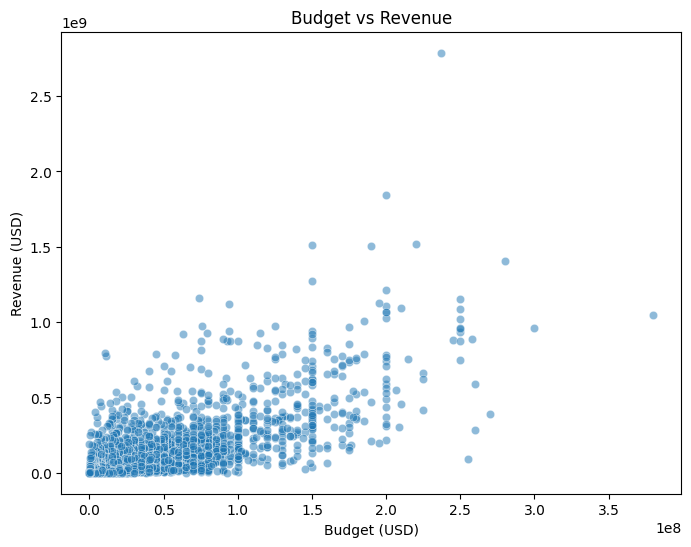

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='budget', y='revenue', alpha=0.5)
plt.title('Budget vs Revenue')
plt.xlabel('Budget (USD)')
plt.ylabel('Revenue (USD)')
plt.show()

In [ ]:
# Train data
X = data[['budget']]
y = data[['revenue']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = LinearRegression(fit_intercept = True)
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# Check model accuracy
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Model Evaluation:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"Intercept: {model.intercept_[0]:,.2f}")
print(f"Coefficient (Budget): {model.coef_[0][0]:.6f}")


Model Evaluation:
R² Score: 0.4790
MAE: 82,042,024.19
RMSE: 162,279,531.22
Intercept: 4,663,819.34
Coefficient (Budget): 2.861682


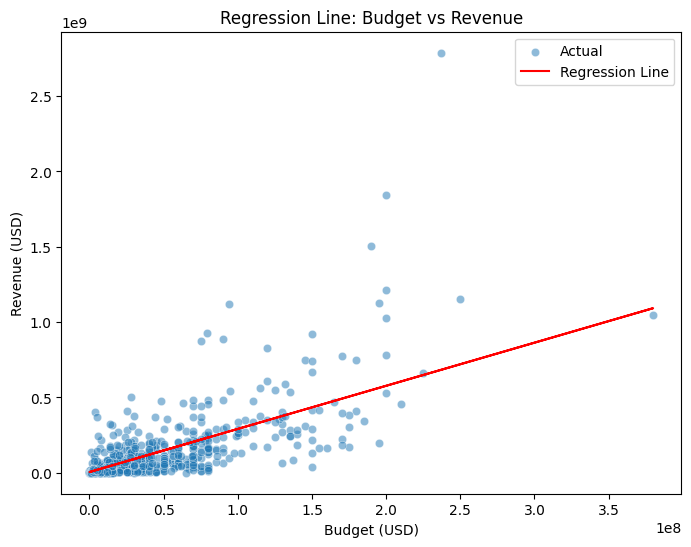

In [ ]:
# Visualize linear regression line
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test['budget'], y=y_test['revenue'], alpha=0.5, label='Actual')
plt.plot(X_test['budget'], y_pred, color='red', label='Regression Line')
plt.title('Regression Line: Budget vs Revenue')
plt.xlabel('Budget (USD)')
plt.ylabel('Revenue (USD)')
plt.legend()
plt.show()

In [ ]:
# Example prediction of 100M movie budget
example_budget = np.array([[100000000]])  # $100M
predicted_revenue = model.predict(example_budget)[0][0]
print(f"Predicted revenue for $100M budget: ${predicted_revenue:,.2f}")

Predicted revenue for $100M budget: $290,831,988.66


d:\UNY\Semester5\AplikasiWeb\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [12]:
# Save trained model
joblib.dump(model, 'movie_revenue_regression.pkl')
print("✅ Model saved successfully as 'movie_revenue_regression.pkl'")

✅ Model saved successfully as 'movie_revenue_regression.pkl'
